In [1]:
import numpy as np
import pandas as pd
import psycopg2
import matplotlib.pylab as plt #for visualization
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from connection import db_string
from sqlalchemy import create_engine
import pmdarima as pm

In [2]:
engine = create_engine(db_string)

In [3]:
#print result of query
china_df = pd.read_sql(
    '''SELECT mid_year, population from populations where country_id = '1' ''',
    con = engine
)
china_df=china_df.rename(columns={"mid_year":"Year", "population":"Population (Thousands)"})
china_df

,Year,Population (Thousands)
0,1990,1172445
1,1991,1189184
2,1992,1204004
3,1993,1217129
4,1994,1228992
5,1995,1239940
6,1996,1249981
7,1997,1259067
8,1998,1267442
9,1999,1275407


In [4]:
#print result of query
india_df = pd.read_sql(
    '''SELECT mid_year, population from populations where country_id = '2' ''',
    con = engine
)
india_df=india_df.rename(columns={"mid_year":"Year", "population":"Population (Thousands)"})
india_df

,Year,Population (Thousands)
0,1990,870133
1,1991,888055
2,1992,906021
3,1993,924058
4,1994,942204
5,1995,960483
6,1996,978893
7,1997,997405
8,1998,1015974
9,1999,1034539


In [5]:
#print result of query
indonesia_df = pd.read_sql(
    '''SELECT mid_year, population from populations where country_id = '3' ''',
    con = engine
)
indonesia_df=indonesia_df.rename(columns={"mid_year":"Year", "population":"Population (Thousands)"})
indonesia_df

,Year,Population (Thousands)
0,1990,181437
1,1991,184616
2,1992,187766
3,1993,190880
4,1994,193945
5,1995,196958
6,1996,199915
7,1997,202826
8,1998,205716
9,1999,208613


In [6]:
#print result of query
america_df = pd.read_sql(
    '''SELECT mid_year, population from populations where country_id = '4' ''',
    con = engine
)
america_df=america_df.rename(columns={"mid_year":"Year", "population":"Population (Thousands)"})
america_df

,Year,Population (Thousands)
0,1990,252530
1,1991,254975
2,1992,257454
3,1993,260020
4,1994,262742
5,1995,265659
6,1996,268803
7,1997,272137
8,1998,275543
9,1999,278862


# China

### Data Prepocessing

Not much data prepocessing was necessary for this set of data. The data was retrieved from the SQL database using 'psycopg2' and placed into a Pandas DataFrame. The data was then split into a training set and a test set.

### Feature Engineering
As this was a dataset with only 2 features (time, and population in thousands) those were the two features used. A time-series analysis model was used so both columns, the value and time, were necessary.

In [7]:
#train test split
#aiming for 80% split 
#25 train
#7 test
training_data = china_df[0:25]

test_data = china_df[25:]
test_data


,Year,Population (Thousands)
25,2015,1397029
26,2016,1403500
27,2017,1409517
28,2018,1415046
29,2019,1420062
30,2020,1424548
31,2021,1428481


### Training/Testing Split
The dataset used had 32 rows. A train/test ratio of ~80/20 was used as that ratio is usually regarded as a generally good starting split. In this case, the last 7 entries were used as the testing set.

In [8]:
#EDA

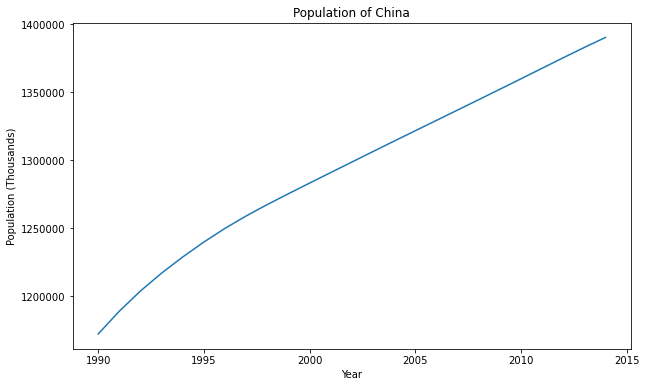

In [9]:
X_training=training_data['Year'].astype('int32')
y_training= training_data['Population (Thousands)'].astype('int32')
plt.plot(X_training,y_training)
plt.xlabel('Year')
plt.ylabel('Population (Thousands)')
plt.title(label='Population of China')
plt.ticklabel_format(style='plain')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

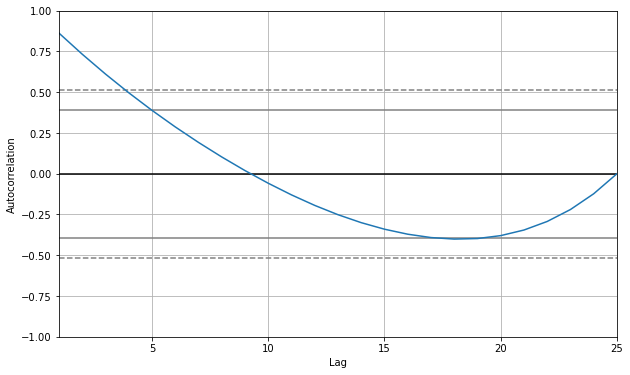

In [10]:
#auto correlation of un altered data. looking to see if it needs to be differenced
autocorrelation_plot(y_training)
#stays positive for about 9 lags
#probably needs to be differenced at least once

In [11]:
# checking stationarity with Augmented Dickey Fuller Test (adfuller)
result = adfuller(y_training)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.657430
p-value: 0.453169


In [12]:
#null value in this test is that the series is non-stationary
# p-value is large so we can't reject null hypothesis
# therefore series is non-stationary and needs to be differenced

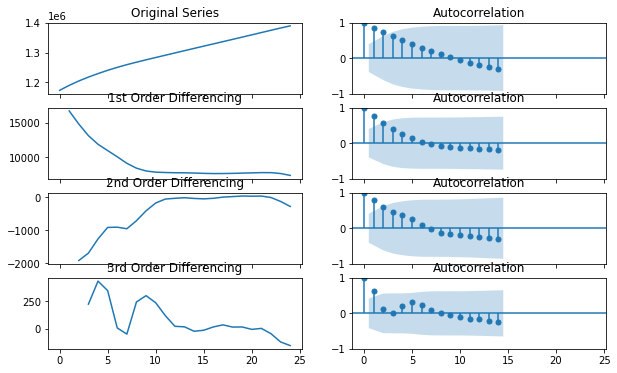

In [13]:
#exploring differencing
# Original Series

fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(y_training); axes[0, 0].set_title('Original Series')
plot_acf(y_training, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y_training.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y_training.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y_training.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y_training.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(y_training.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(y_training.diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

In [14]:
# doesn't reach stationarity but 
# the 3rd order differencing has the autocorrelation reach 0 the fastest (around 2-3 lags) any higher order would 
# most likely make it dip into the negatives too quickly
# so try d at 3

C:\Users\djkri\anaconda3\envs\mlenv\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


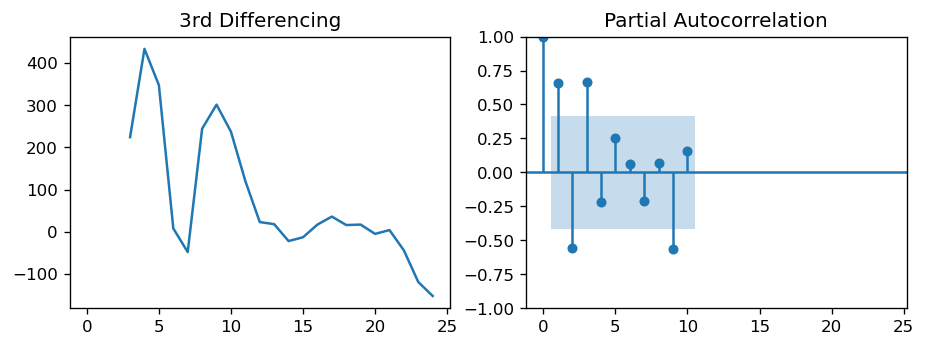

In [15]:
#partial auto correlation to find p term
# PACF plot of 3rd differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_training.diff().diff().diff()); axes[0].set_title('3rd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(y_training.diff().diff().diff().dropna(), ax=axes[1], lags = 10)

plt.show()

In [16]:
# value at first lag is significant (outside of the blue boxed region)
# significant at lag 2 as well but will set p at 1 for now

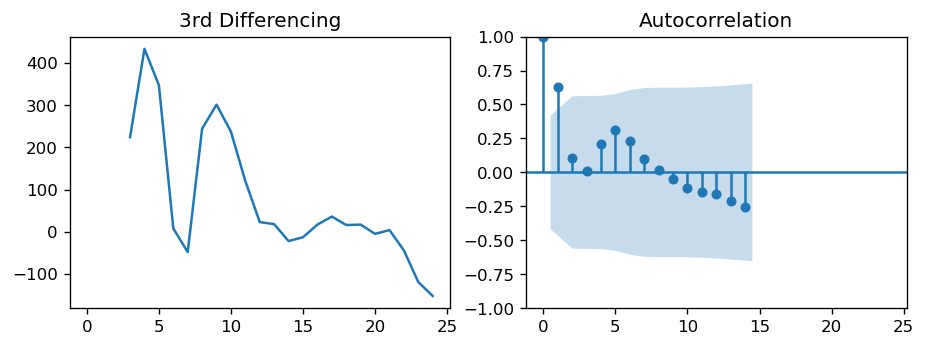

In [17]:
#auto correlation for differenced series to find q value
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_training.diff().diff().diff()); axes[0].set_title('3rd Differencing')
axes[1].set(ylim=(0,5))
plot_acf(y_training.diff().diff().diff().dropna(), ax=axes[1])

plt.show()

In [18]:
#similar to pacf
# 1 and 2 are signifcant
# will start with 1 but 2 could also work

In [19]:
#orders for arima model 
#(p,d,q)
# (1,3,1)

### Model Choice and Pros/Cons
The model chosen was an ARIMA (auto-regressive integrated moving average) model. ARIMA is a popularly used model for time-series forecasting. Advantages of this model include; it is a recursive forecasting method (as opposed to a direct method) meaning the model can be used to forecast different time-steps by using the previous prediction as the input for the next prediction and its extendability (able to extend how far into the future the predictions are, this is due to its recursiveness). Meanwhile, the disadvantages of this model are; its poorer performance over longer periods of time and that it has difficulty predicting turning points. The ARIMA model can also be more difficult, for those who are not highly experienced with the model, to adjust and optimize than other time-series forecasting models such as a neural network.

In [20]:
#arima model
#this auto_arima function will test a variety of models with different values for p, q, and d
#it will determine the 'best' model by choosing the one with the lowest AIC
model = pm.auto_arima(y_training, start_p=0, start_q=0, information_criterion= 'aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=3,           # set to 3 as it was chosen from the diagrams
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=289.997, Time=0.12 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=289.837, Time=0.02 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=289.915, Time=0.04 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=282.400, Time=0.04 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=275.841, Time=0.04 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=275.281, Time=0.09 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=274.271, Time=0.07 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=276.734, Time=0.13 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=274.331, Time=0.08 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=277.079, Time=0.12 sec
 ARIMA(2,3,1)(0,0,0)[0] intercept   : AIC=275.535, Time=0.11 sec

Best model:  ARIMA(2,3,1)(0,0,0)[0]          
Total fit time: 0.900 seconds
                               SARIMAX Results                                
Dep. Variable:           

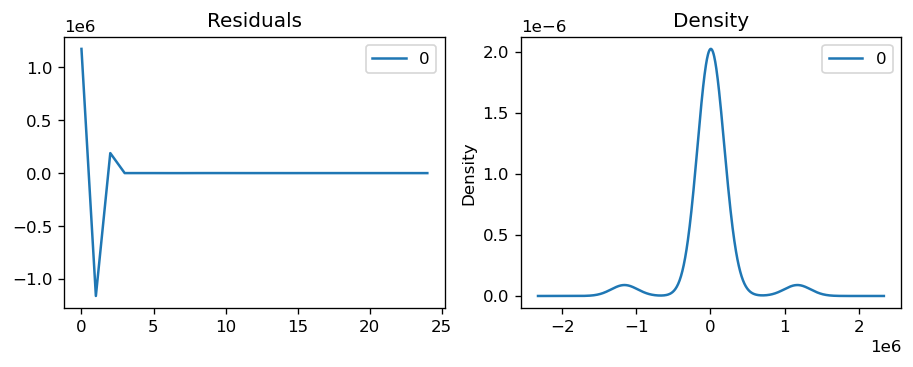

In [21]:
residuals = pd.DataFrame(model.resid())
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [22]:
#making predictions
y_pred = pd.Series(model.predict(7))
y_pred

0    1.397144e+06
1    1.403888e+06
2    1.410337e+06
3    1.416486e+06
4    1.422332e+06
5    1.427873e+06
6    1.433105e+06
dtype: float64

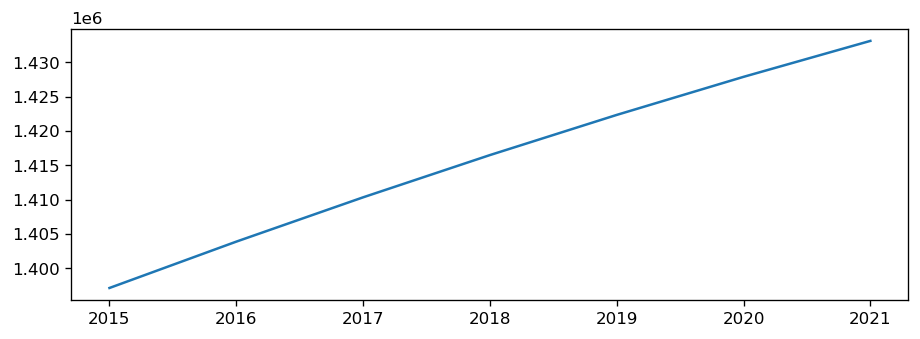

In [23]:
#rename forecast index to correct years
y_pred= y_pred.rename({0:2015, 1:2016, 2:2017, 3:2018, 4:2019, 5:2020, 6:2021})
y_pred.plot()
plt.show()


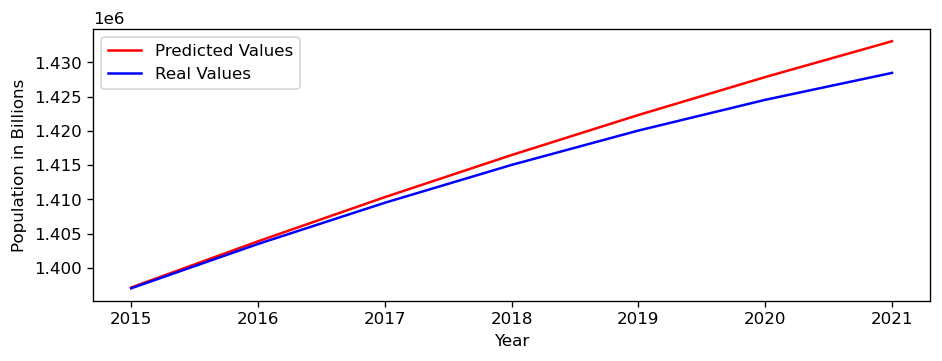

In [24]:
#now plot the model predictions and the test data
y_real = test_data['Population (Thousands)'].astype('int32')
y_real= y_real.rename({25:2015, 26:2016, 27:2017, 28:2018, 29:2019, 30:2020, 31:2021})
y_pred.plot(color='red', label = "Predicted Values")
y_real.plot(color='blue', label = "Real Values")
plt.xlabel("Year")
plt.ylabel('Population in Billions')
plt.legend()
plt.show()

In [25]:
# prediction analysis
#mean absolute percent error
mape = np.mean(np.abs(y_pred-y_real)/np.abs(y_real))

#mean absolute scaled error
n = training_data.shape[0]
d = np.abs(np.diff(y_training)).sum()/(n-1)
errors = np.abs(y_real - y_pred)
mase = errors.mean()/d
print(f"MAPE: {mape}",
     f"\nMASE: {mase}")

MAPE: 0.0013040927962657846 
MASE: 0.20450696014795722


In [26]:
#mape and mase are good for time series as they can deal with the scale of a time series forecast better than other 
#methods of accuracy/error calculation

#mase compares the predictions of the model to a naive model, meaning a model that uses the last observed value as the value
# for all of the predictions
# a mase of 1 means that the model is just as accurate as picking the last observed value over and over as the prediction
# a mase of 0.5 means that the model is twice as accurate as the naive model


#the mape is a measure of error that is scale independent so it is useful for evaluating error of time series forecasting
#the mape is represented as a percentage
# so our mape of 0.04% should be considered a relatively good error.

In [27]:
#forecasting out past 2021
#will use full dataset for the model to get more accurate forecast
#arima model
model = pm.auto_arima(china_df['Population (Thousands)'], start_p=0, start_q=0, information_criterion= 'aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=3,           # set to 3 as it was chosen from the diagrams
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=374.526, Time=0.01 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=373.633, Time=0.02 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=373.763, Time=0.02 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=363.336, Time=0.03 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=354.463, Time=0.05 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=353.846, Time=0.10 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=352.982, Time=0.07 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=378.503, Time=0.03 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=358.314, Time=0.11 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=353.074, Time=0.09 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=355.434, Time=0.12 sec
 ARIMA(2,3,1)(0,0,0)[0] intercept   : AIC=353.044, Time=0.12 sec

Best model:  ARIMA(2,3,1)(0,0,0)[0]          
Total fit time: 0.786 seconds
                               SARIMAX Results                                
Dep. Variable:       

In [28]:
#make predictions lets do out to 7 again like the test data
#making predictions
y_pred = pd.Series(model.predict(7))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
y_pred = y_pred.rename({0:2022, 1:2023, 2:2024, 3:2025, 4:2026, 5:2027, 6:2028})
y_pred.to_csv('china_predictions.csv')

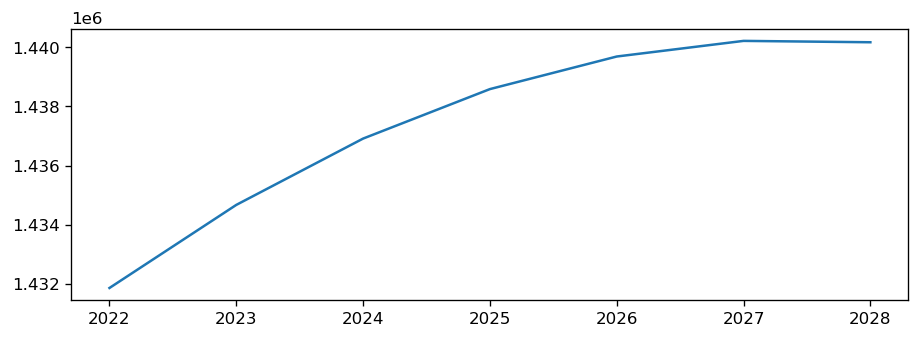

In [29]:
y_pred.plot()
plt.show()

# India

### Data Prepocessing

Not much data prepocessing was necessary for this set of data. The data was retrieved from the SQL database using 'psycopg2' and placed into a Pandas DataFrame. The data was then split into a training set and a test set.

### Feature Engineering
As this was a dataset with only 2 features (time, and population in thousands) those were the two features used. A time-series analysis model was used so both columns, the value and time, were necessary.

In [30]:
#train test split
#aiming for 80% split 
#25 train
#7 test
india_train = india_df[0:25]

india_test = india_df[25:]
india_test

,Year,Population (Thousands)
25,2015,1309054
26,2016,1324171
27,2017,1339180
28,2018,1354052
29,2019,1368738
30,2020,1383198
31,2021,1397423


### EDA

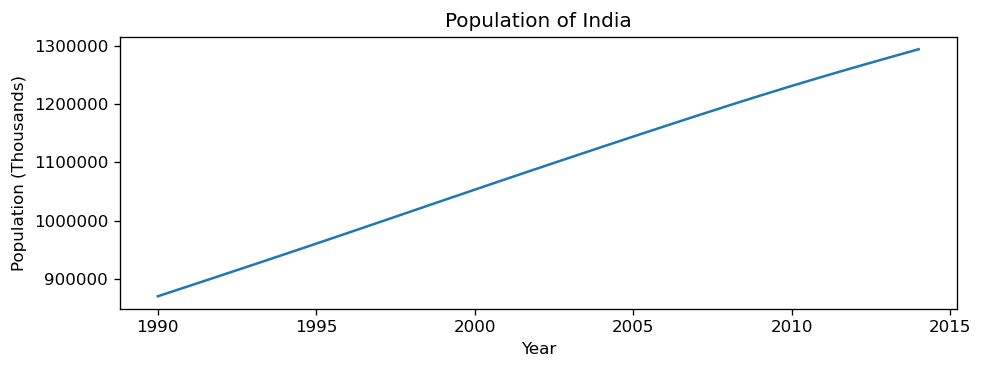

In [31]:
X_training=india_train['Year'].astype('int32')
y_training= india_train['Population (Thousands)'].astype('int32')
plt.plot(X_training,y_training)
plt.xlabel('Year')
plt.ylabel('Population (Thousands)')
plt.title(label='Population of India')
plt.ticklabel_format(style='plain')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

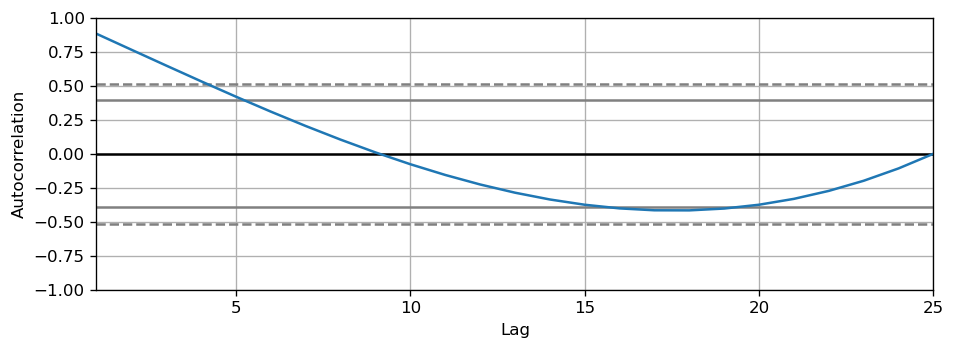

In [32]:
#auto correlation of un altered data. looking to see if it needs to be differenced
autocorrelation_plot(y_training)
#stays positive for about 9 lags
#probably needs to be differenced at least once

In [33]:
# checking stationarity with Augmented Dickey Fuller Test (adfuller)
result = adfuller(y_training)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.256342
p-value: 0.931464


In [34]:
#null value in this test is that the series is non-stationary
# p-value is large so we can't reject null hypothesis
# therefore series is non-stationary and needs to be differenced

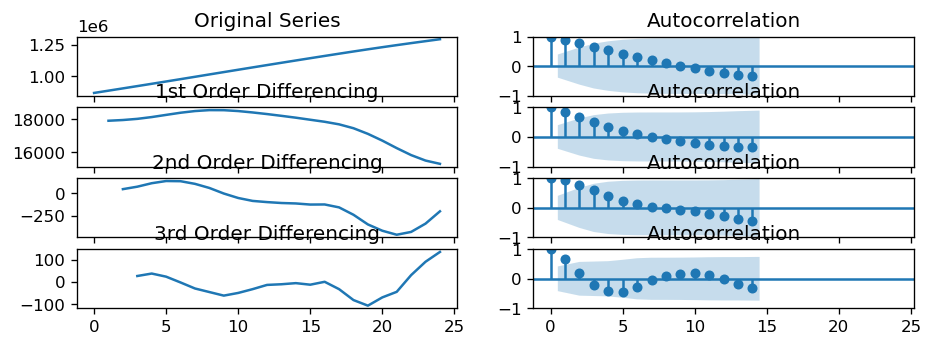

In [35]:
#exploring differencing
# Original Series

fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(y_training); axes[0, 0].set_title('Original Series')
plot_acf(y_training, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y_training.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y_training.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y_training.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y_training.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(y_training.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(y_training.diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

In [36]:
# doesn't reach stationarity but 
# the 3rd order differencing has the autocorrelation reach 0 the fastest (around 2-3 lags) any higher order would 
# most likely make it dip into the negatives too quickly
# so try d at 3

C:\Users\djkri\anaconda3\envs\mlenv\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


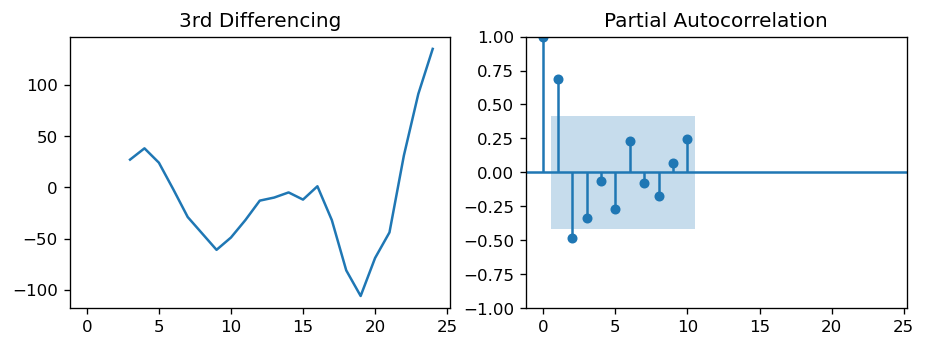

In [37]:
#partial auto correlation to find p term
# PACF plot of 3rd differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_training.diff().diff().diff()); axes[0].set_title('3rd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(y_training.diff().diff().diff().dropna(), ax=axes[1], lags = 10)

plt.show()

In [38]:
# value at first lag is significant (outside of the blue boxed region)
# significant at lag 2 as well. so ideal p might be either 1 or 2

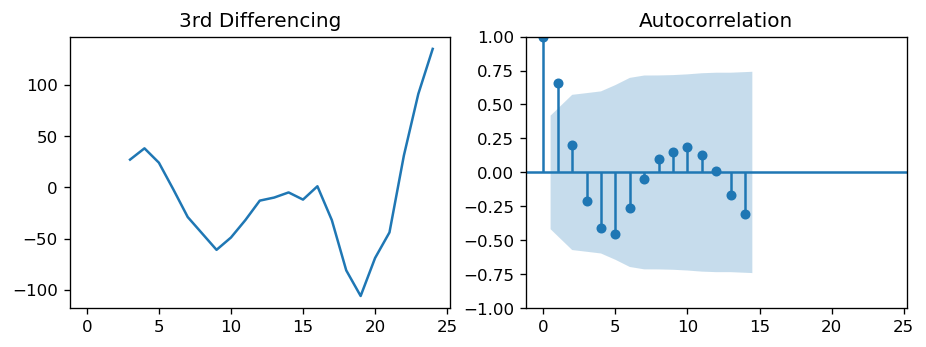

In [39]:
#auto correlation for differenced series to find q value
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_training.diff().diff().diff()); axes[0].set_title('3rd Differencing')
axes[1].set(ylim=(0,5))
plot_acf(y_training.diff().diff().diff().dropna(), ax=axes[1])

plt.show()

In [40]:
#similar to pacf
# 1 and 2 are signifcant

### Model Choice and Pros/Cons
The model chosen was an ARIMA (auto-regressive integrated moving average) model. ARIMA is a popularly used model for time-series forecasting. Advantages of this model include; it is a recursive forecasting method (as opposed to a direct method) meaning the model can be used to forecast different time-steps by using the previous prediction as the input for the next prediction and its extendability (able to extend how far into the future the predictions are, this is due to its recursiveness). Meanwhile, the disadvantages of this model are; its poorer performance over longer periods of time and that it has difficulty predicting turning points. The ARIMA model can also be more difficult, for those who are not highly experienced with the model, to adjust and optimize than other time-series forecasting models such as a neural network.

In [41]:
#arima model
#this auto_arima function will test a variety of models with different values for p, q, and d
#it will determine the 'best' model by choosing the one with the lowest AIC
model = pm.auto_arima(y_training, start_p=0, start_q=0, information_criterion= 'aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=308.309, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=314.035, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=309.752, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=314.035, Time=0.00 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.169 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -152.155
Date:                Wed, 27 Jul 2022   AIC                            308.309
Time:                        19:32:42   BIC                            310.580
Sample:                             0   HQIC                           308.880
                                 - 25                                         
Covari

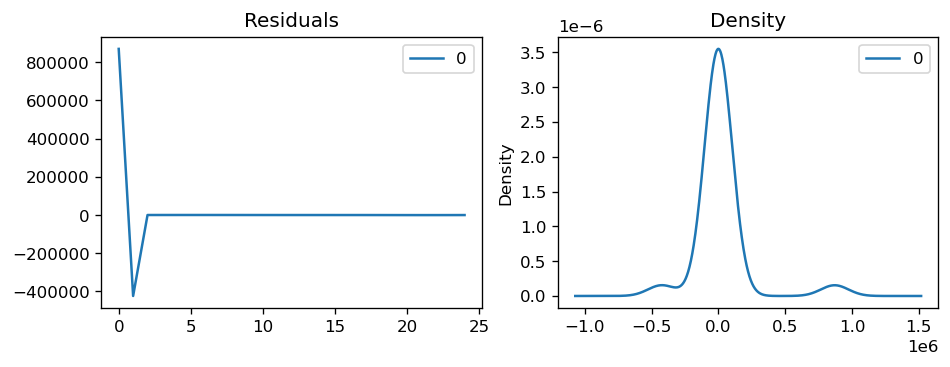

In [42]:
residuals = pd.DataFrame(model.resid())
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [43]:
#making predictions
y_pred = pd.Series(model.predict(7))
y_pred

0   1309041.870
1   1324110.609
2   1339065.217
3   1353905.696
4   1368632.043
5   1383244.261
6   1397742.348
dtype: float64

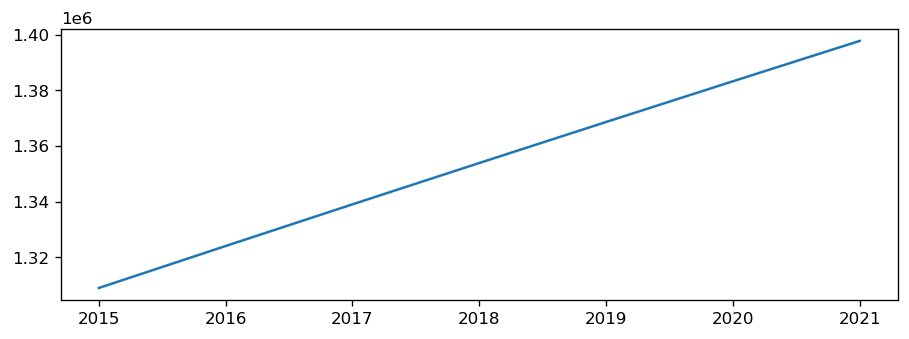

In [44]:
#rename forecast index to correct years
y_pred= y_pred.rename({0:2015, 1:2016, 2:2017, 3:2018, 4:2019, 5:2020, 6:2021})
y_pred.plot()
plt.show()


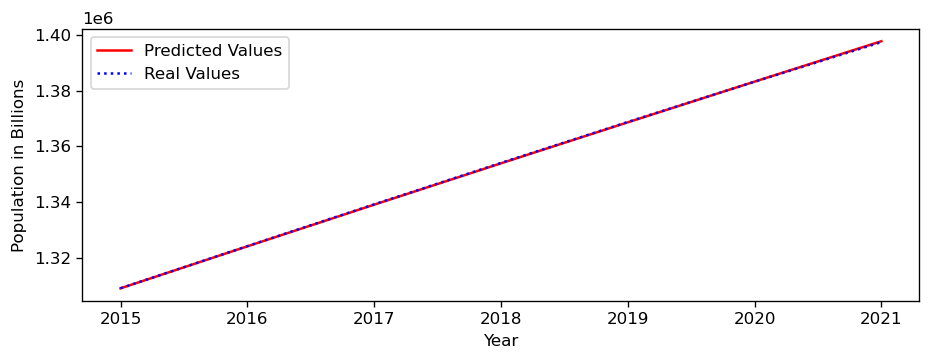

In [45]:
#now plot the model predictions and the test data
y_real = india_test['Population (Thousands)'].astype('int32')
y_real= y_real.rename({25:2015, 26:2016, 27:2017, 28:2018, 29:2019, 30:2020, 31:2021})
y_pred.plot(color='red', label = "Predicted Values")
plt.plot(y_real, 'b:', label = "Real Values")
plt.xlabel("Year")
plt.ylabel('Population in Billions')
plt.legend()
plt.show()
#had to change real values to dotted line to make the predicted values visible

In [46]:
# prediction analysis
#mean absolute percent error
mape = np.mean(np.abs(y_pred-y_real)/np.abs(y_real))

#mean absolute scaled error
n = training_data.shape[0]
d = np.abs(np.diff(y_training)).sum()/(n-1)
errors = np.abs(y_real - y_pred)
mase = errors.mean()/d
print(f"MAPE: {mape}",
     f"\nMASE: {mase}")

MAPE: 8.400239734141639e-05 
MASE: 0.006515050464907635


                                 SARIMAX Results                                  
Dep. Variable:     Population (Thousands)   No. Observations:                   32
Model:                     ARIMA(0, 2, 0)   Log Likelihood                -201.984
Date:                    Wed, 27 Jul 2022   AIC                            405.968
Time:                            19:32:43   BIC                            407.369
Sample:                                 0   HQIC                           406.416
                                     - 32                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.125e+04   1.11e+04      3.726      0.000    1.96e+04    6.29e+04
Ljung-Box (L1) (Q):                  28.12   Jarque-Bera (JB):                 0.79
Prob(Q):       

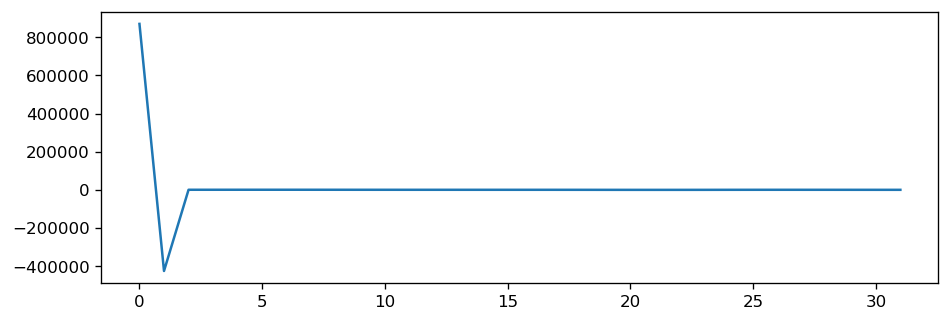

In [47]:
#forecasting out past 2021
#will use full dataset for the model to get more accurate forecast
#arima model
india_fulldata = india_df['Population (Thousands)'].astype('int')
model = ARIMA(india_fulldata, order = (0,2,0))
results_india = model.fit()
print(results_india.summary())
residuals = results_india.resid
residuals.plot()
plt.show()

In [48]:
#make predictions lets do out to 7 again like the test data
#making predictions
y_pred = pd.Series(results_india.forecast(7))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
y_pred = y_pred.rename({32:2022, 33:2023, 34:2024, 35:2025, 36:2026, 37:2027, 38:2028})
y_pred.to_csv('india_predictions.csv')

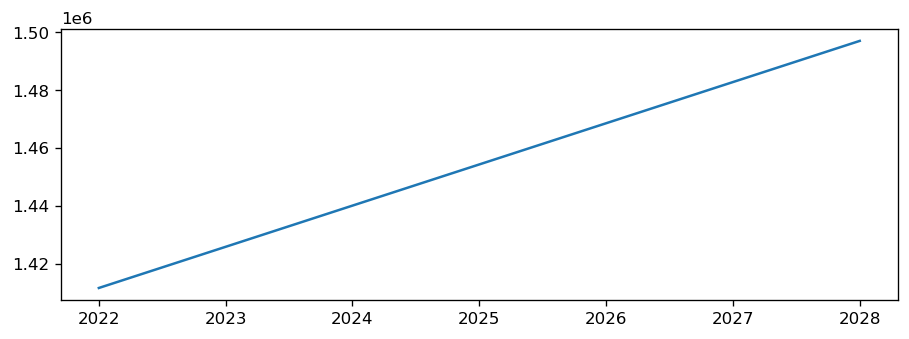

2022   1411648.000
2023   1425873.000
2024   1440098.000
2025   1454323.000
2026   1468548.000
2027   1482773.000
2028   1496998.000
Name: predicted_mean, dtype: float64

In [49]:
y_pred.plot()
plt.show()
y_pred

# Indonesia

In [50]:
#train test split
#aiming for 80% split 
#25 train
#7 test
indonesia_train = indonesia_df[0:25]

indonesia_test = indonesia_df[25:]
indonesia_test


,Year,Population (Thousands)
25,2015,258162
26,2016,261115
27,2017,263991
28,2018,266795
29,2019,269536
30,2020,272223
31,2021,274854


### EDA

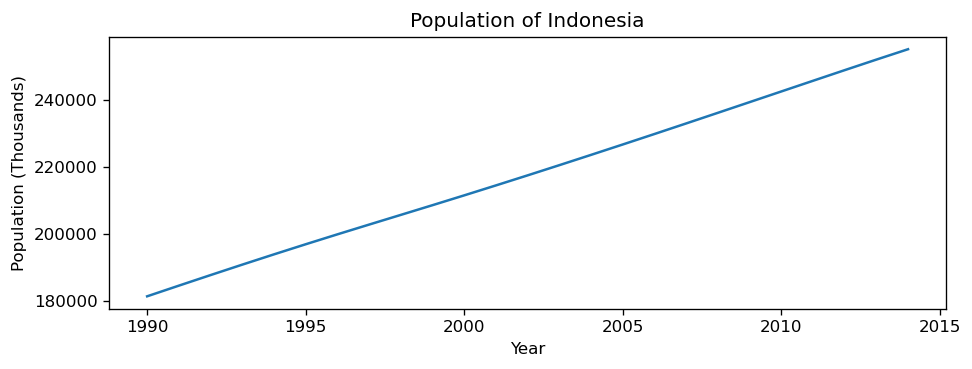

In [51]:
X_training=indonesia_train['Year'].astype('int32')
y_training= indonesia_train['Population (Thousands)'].astype('int32')
plt.plot(X_training,y_training)
plt.xlabel('Year')
plt.ylabel('Population (Thousands)')
plt.title(label='Population of Indonesia')
plt.ticklabel_format(style='plain')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

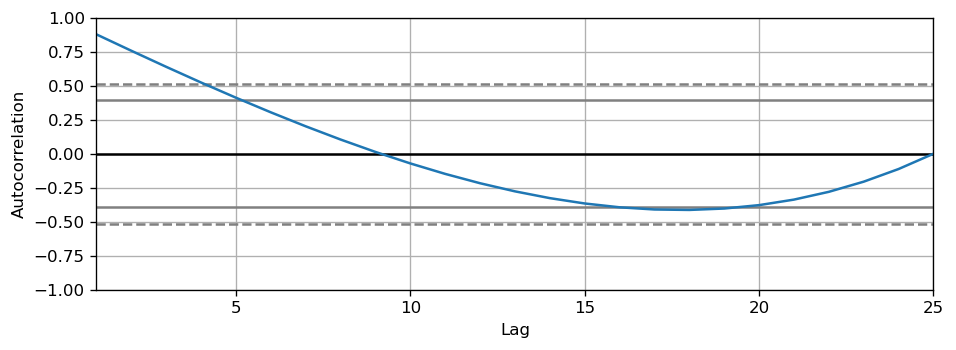

In [52]:
#auto correlation of un altered data. looking to see if it needs to be differenced
autocorrelation_plot(y_training)
#stays positive for about 9 lags
#probably needs to be differenced at least once

In [53]:
# checking stationarity with Augmented Dickey Fuller Test (adfuller)
result = adfuller(y_training)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.135877
p-value: 0.968427


In [54]:
#null value in this test is that the series is non-stationary
# p-value is large so we can't reject null hypothesis
# therefore series is non-stationary and needs to be differenced

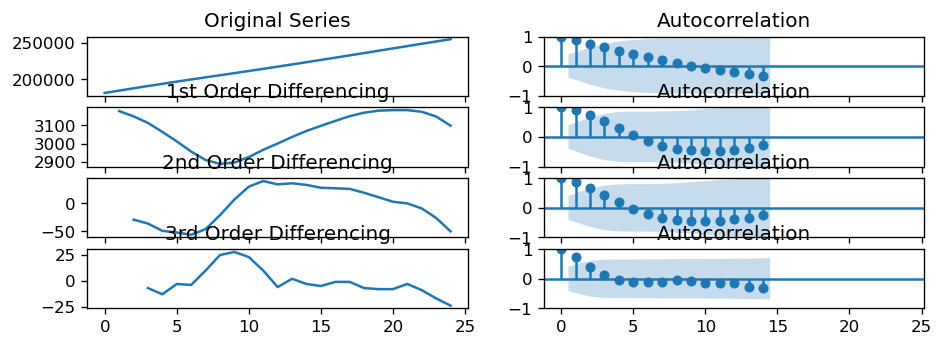

In [55]:
#exploring differencing
# Original Series

fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(y_training); axes[0, 0].set_title('Original Series')
plot_acf(y_training, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y_training.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y_training.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y_training.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y_training.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(y_training.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(y_training.diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

In [56]:
# doesn't reach stationarity but 
# the 3rd order differencing has the autocorrelation reach 0 the fastest (around 2-3 lags) any higher order would 
# most likely make it dip into the negatives too quickly
# but wouldn't be surprised with 1 or 2 differencing

C:\Users\djkri\anaconda3\envs\mlenv\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


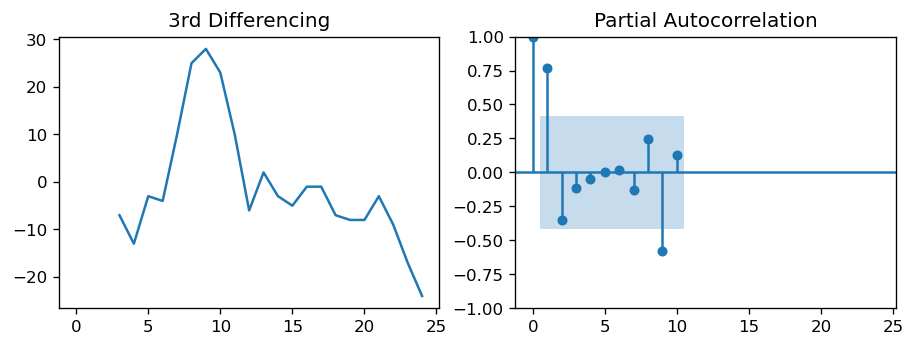

In [57]:
#partial auto correlation to find p term
# PACF plot of 3rd differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_training.diff().diff().diff()); axes[0].set_title('3rd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(y_training.diff().diff().diff().dropna(), ax=axes[1], lags = 10)

plt.show()

In [58]:
# value at first lag is significant (outside of the blue boxed region)
# significant at lag 2 as well. so ideal p might be either 1 or 2

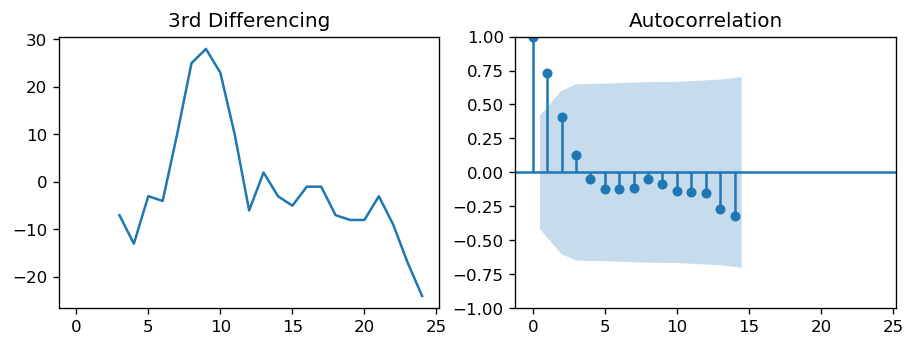

In [59]:
#auto correlation for differenced series to find q value
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_training.diff().diff().diff()); axes[0].set_title('3rd Differencing')
axes[1].set(ylim=(0,5))
plot_acf(y_training.diff().diff().diff().dropna(), ax=axes[1])

plt.show()

In [60]:
#similar to pacf
# 1 and 2 are signifcant

### Model Choice and Pros/Cons
The model chosen was an ARIMA (auto-regressive integrated moving average) model. ARIMA is a popularly used model for time-series forecasting. Advantages of this model include; it is a recursive forecasting method (as opposed to a direct method) meaning the model can be used to forecast different time-steps by using the previous prediction as the input for the next prediction and its extendability (able to extend how far into the future the predictions are, this is due to its recursiveness). Meanwhile, the disadvantages of this model are; its poorer performance over longer periods of time and that it has difficulty predicting turning points. The ARIMA model can also be more difficult, for those who are not highly experienced with the model, to adjust and optimize than other time-series forecasting models such as a neural network.

In [61]:
#arima model
#this auto_arima function will test a variety of models with different values for p, q, and d
#it will determine the 'best' model by choosing the one with the lowest AIC
model = pm.auto_arima(y_training, start_p=0, start_q=0, information_criterion= 'aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=229.775, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=193.464, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=228.032, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=176.919, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=178.246, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=178.108, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=182.942, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=180.098, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=174.920, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=191.677, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=176.256, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=176.117, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=181.096, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=178.106, 

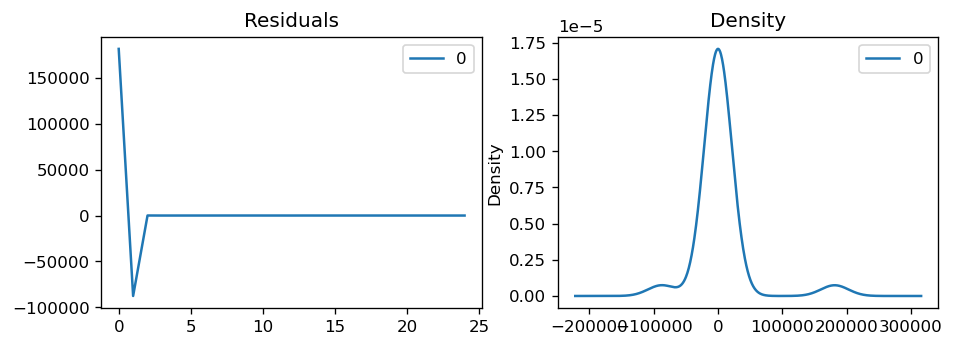

In [62]:
residuals = pd.DataFrame(model.resid())
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [63]:
#making predictions
y_pred = pd.Series(model.predict(7))
y_pred

0   258171.121
1   261155.239
2   264093.870
3   267001.186
4   269891.709
5   272777.985
6   275669.291
dtype: float64

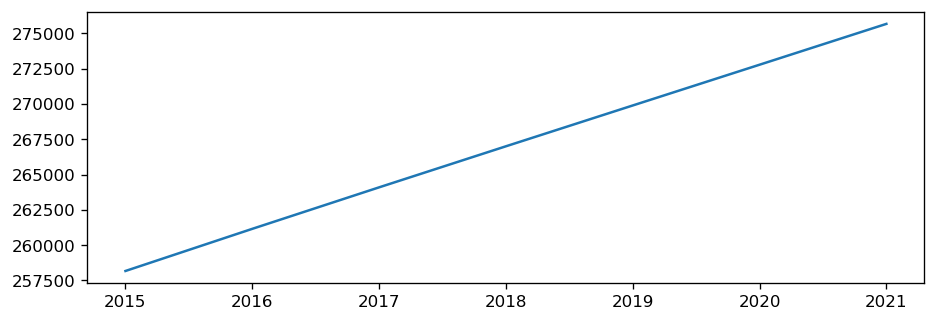

In [64]:
#rename forecast index to correct years
y_pred= y_pred.rename({0:2015, 1:2016, 2:2017, 3:2018, 4:2019, 5:2020, 6:2021})
y_pred.plot()
plt.show()


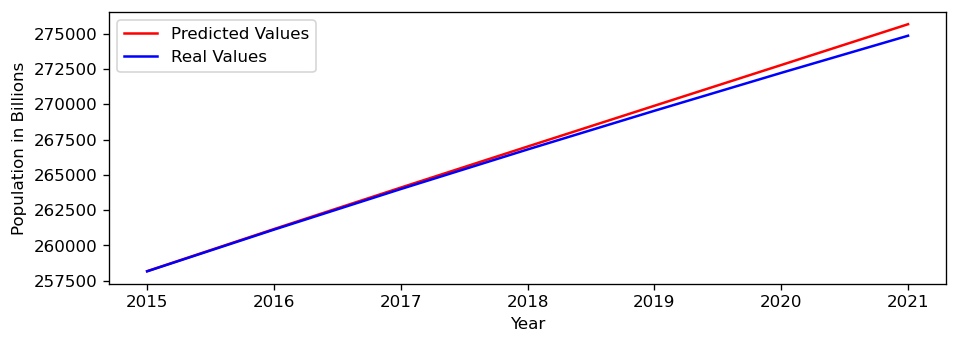

In [65]:
#now plot the model predictions and the test data
y_real = indonesia_test['Population (Thousands)'].astype('int32')
y_real= y_real.rename({25:2015, 26:2016, 27:2017, 28:2018, 29:2019, 30:2020, 31:2021})
y_pred.plot(color='red', label = "Predicted Values")
y_real.plot(color='blue', label = "Real Values")
plt.xlabel("Year")
plt.ylabel('Population in Billions')
plt.legend()
plt.show()

In [66]:
# prediction analysis
#mean absolute percent error
mape = np.mean(np.abs(y_pred-y_real)/np.abs(y_real))

#mean absolute scaled error
n = training_data.shape[0]
d = np.abs(np.diff(y_training)).sum()/(n-1)
errors = np.abs(y_real - y_pred)
mase = errors.mean()/d
print(f"MAPE: {mape}",
     f"\nMASE: {mase}")

MAPE: 0.001096660997626011 
MASE: 0.09697558679967491


                                 SARIMAX Results                                  
Dep. Variable:     Population (Thousands)   No. Observations:                   32
Model:                     ARIMA(2, 2, 0)   Log Likelihood                -108.718
Date:                    Wed, 27 Jul 2022   AIC                            223.437
Time:                            19:32:47   BIC                            227.640
Sample:                                 0   HQIC                           224.781
                                     - 32                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5664      0.069     22.788      0.000       1.432       1.701
ar.L2         -0.6703      0.071     -9.497      0.000      -0.809      -0.532
sigma2        35.360

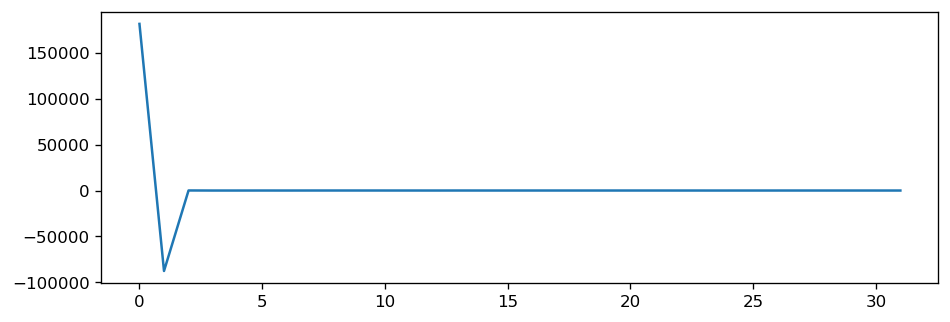

In [67]:
#forecasting out past 2021
#will use full dataset for the model to get more accurate forecast
#arima model
indonesia_fulldata = indonesia_df['Population (Thousands)'].astype('int')
model = ARIMA(indonesia_fulldata, order=(2,2,0))
results_indonesia = model.fit()
print(results_indonesia.summary())
residuals = results_indonesia.resid
residuals.plot()
plt.show()

In [68]:
#make predictions lets do out to 7 again like the test data
#making predictions
y_pred = pd.Series(results_indonesia.forecast(7))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
y_pred = y_pred.rename({32:2022, 33:2023, 34:2024, 35:2025, 36:2026, 37:2027, 38:2028})
y_pred.to_csv('indonesia_predictions.csv')

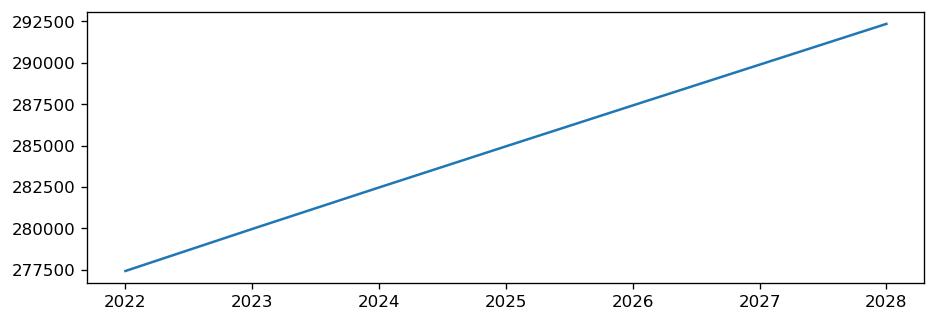

2022   277433.478
2023   279969.790
2024   282473.023
2025   284953.374
2026   287420.059
2027   289880.674
2028   292340.943
Name: predicted_mean, dtype: float64

In [69]:
y_pred.plot()
plt.show()
y_pred

# USA

In [70]:
#train test split
#aiming for 80% split 
#25 train
#7 test
america_train = america_df[0:25]

america_test = america_df[25:]
america_test


,Year,Population (Thousands)
25,2015,319929
26,2016,322180
27,2017,324459
28,2018,326767
29,2019,329093
30,2020,331432
31,2021,333783


### EDA

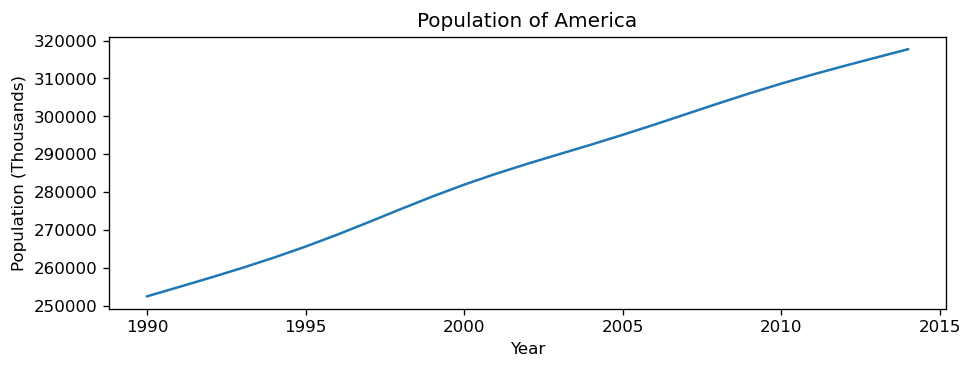

In [71]:
X_training= america_train['Year'].astype('int32')
y_training= america_train['Population (Thousands)'].astype('int32')
plt.plot(X_training,y_training)
plt.xlabel('Year')
plt.ylabel('Population (Thousands)')
plt.title(label='Population of America')
plt.ticklabel_format(style='plain')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

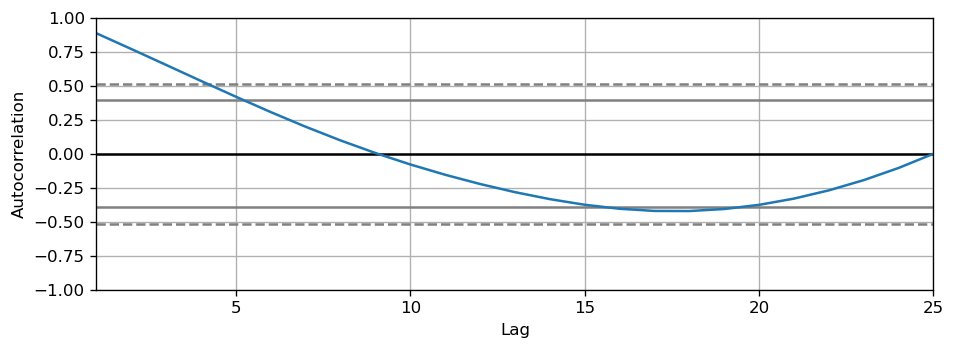

In [72]:
#auto correlation of un altered data. looking to see if it needs to be differenced
autocorrelation_plot(y_training)
#stays positive for about 9 lags
#probably needs to be differenced at least once

In [73]:
# checking stationarity with Augmented Dickey Fuller Test (adfuller)
result = adfuller(y_training)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.126233
p-value: 0.000000


In [74]:
#null value in this test is that the series is non-stationary
# p-value is large so we can't reject null hypothesis
# therefore series is non-stationary and needs to be differenced

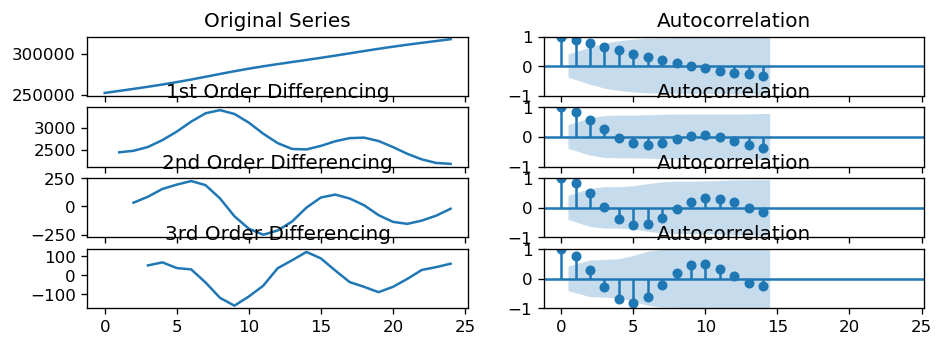

In [75]:
#exploring differencing
# Original Series

fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(y_training); axes[0, 0].set_title('Original Series')
plot_acf(y_training, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y_training.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y_training.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y_training.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y_training.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(y_training.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(y_training.diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

In [76]:
# 2nd order differencing reaches 0 pretty quickly and it probably doesn't need a third differencing so aim for 2

C:\Users\djkri\anaconda3\envs\mlenv\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


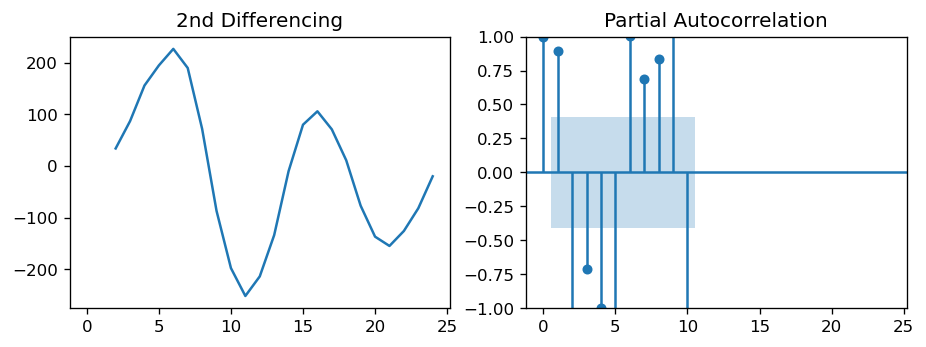

In [77]:
#partial auto correlation to find p term
# PACF plot of 2nd differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_training.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(y_training.diff().diff().dropna(), ax=axes[1], lags = 10)

plt.show()

In [78]:
# value at first lag is significant (outside of the blue boxed region)
# significant at lag 2 as well. so ideal p might be either 1 or 2

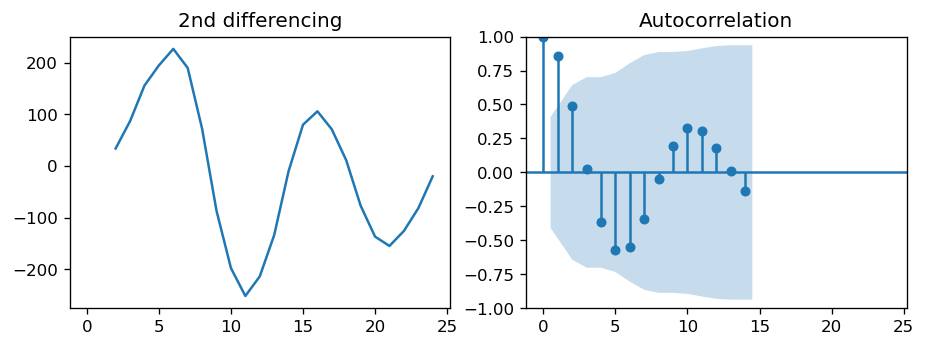

In [79]:
#auto correlation for differenced series to find q value
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_training.diff().diff()); axes[0].set_title('2nd differencing')
axes[1].set(ylim=(0,5))
plot_acf(y_training.diff().diff().dropna(), ax=axes[1])

plt.show()

In [80]:
#similar to pacf
# 1 and 2 are signifcant

### Model Choice and Pros/Cons
The model chosen was an ARIMA (auto-regressive integrated moving average) model. ARIMA is a popularly used model for time-series forecasting. Advantages of this model include; it is a recursive forecasting method (as opposed to a direct method) meaning the model can be used to forecast different time-steps by using the previous prediction as the input for the next prediction and its extendability (able to extend how far into the future the predictions are, this is due to its recursiveness). Meanwhile, the disadvantages of this model are; its poorer performance over longer periods of time and that it has difficulty predicting turning points. The ARIMA model can also be more difficult, for those who are not highly experienced with the model, to adjust and optimize than other time-series forecasting models such as a neural network.

In [81]:
#arima model
#this auto_arima function will test a variety of models with different values for p, q, and d
#it will determine the 'best' model by choosing the one with the lowest AIC
model = pm.auto_arima(y_training, start_p=0, start_q=0, information_criterion= 'aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=295.476, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=297.397, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=297.395, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=293.636, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.196 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -145.818
Date:                Wed, 27 Jul 2022   AIC                            293.636
Time:                        19:32:50   BIC                            294.772
Sample:                             0   HQIC                           293.922
                                 - 25                                         
Covari

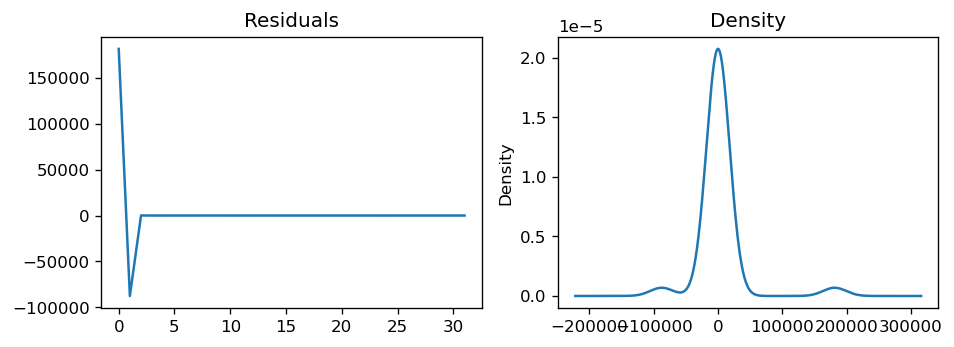

In [82]:
# residuals = pd.DataFrame(model.resid())
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [83]:
#making predictions
y_pred = pd.Series(model.predict(7))
y_pred

0   319901.000
1   322083.000
2   324265.000
3   326447.000
4   328629.000
5   330811.000
6   332993.000
dtype: float64

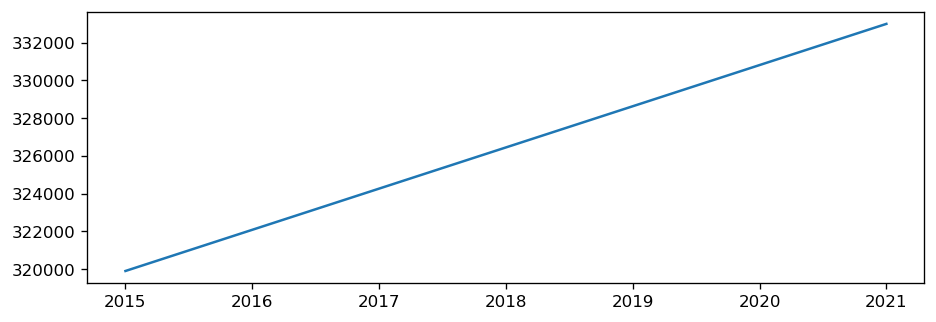

In [84]:
#rename forecast index to correct years
y_pred= y_pred.rename({0:2015, 1:2016, 2:2017, 3:2018, 4:2019, 5:2020, 6:2021})
y_pred.plot()
plt.show()


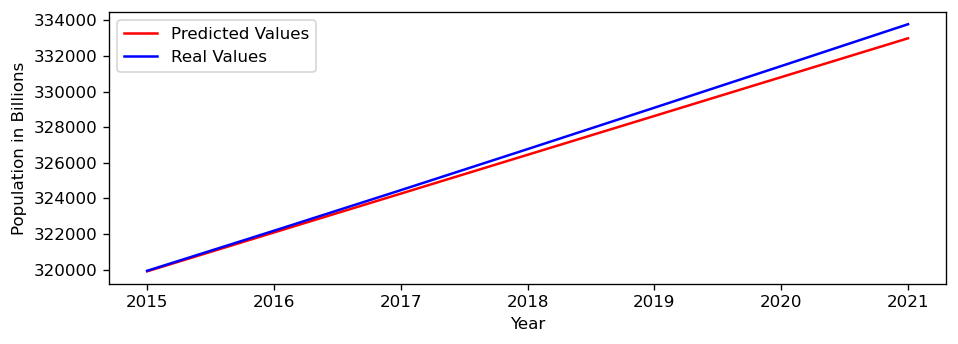

In [85]:
#now plot the model predictions and the test data
y_real = america_test['Population (Thousands)'].astype('int32')
y_real= y_real.rename({25:2015, 26:2016, 27:2017, 28:2018, 29:2019, 30:2020, 31:2021})
y_pred.plot(color='red', label = "Predicted Values")
y_real.plot(color='blue', label = "Real Values")
plt.xlabel("Year")
plt.ylabel('Population in Billions')
plt.legend()
plt.show()

In [86]:
# prediction analysis
#mean absolute percent error
mape = np.mean(np.abs(y_pred-y_real)/np.abs(y_real))

#mean absolute scaled error
n = training_data.shape[0]
d = np.abs(np.diff(y_training)).sum()/(n-1)
errors = np.abs(y_real - y_pred)
mase = errors.mean()/d
print(f"MAPE: {mape}",
     f"\nMASE: {mase}")

MAPE: 0.0010880333245227253 
MASE: 0.13222213213009207


                                 SARIMAX Results                                  
Dep. Variable:     Population (Thousands)   No. Observations:                   32
Model:                     ARIMA(0, 2, 0)   Log Likelihood                -186.375
Date:                    Wed, 27 Jul 2022   AIC                            374.750
Time:                            19:32:50   BIC                            376.151
Sample:                                 0   HQIC                           375.198
                                     - 32                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.457e+04   4424.643      3.294      0.001    5900.713    2.32e+04
Ljung-Box (L1) (Q):                  24.28   Jarque-Bera (JB):                 0.55
Prob(Q):       

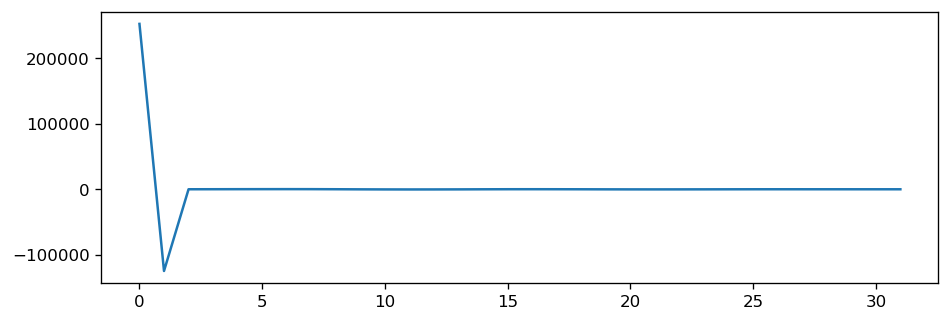

In [87]:
#forecasting out past 2021
#will use full dataset for the model to get more accurate forecast
#arima model
america_fulldata = america_df['Population (Thousands)'].astype('int')
model = ARIMA(america_fulldata, order=(0,2,0))
results_america = model.fit()
print(results_america.summary())
residuals = results_america.resid
residuals.plot()
plt.show()

In [88]:
# make predictions lets do out to 7 again like the test data
#making predictions
y_pred = pd.Series(results_america.forecast(7))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
y_pred = y_pred.rename({32:2022, 33:2023, 34:2024, 35:2025, 36:2026, 37:2027, 38:2028})
y_pred.to_csv('america_predictions.csv')

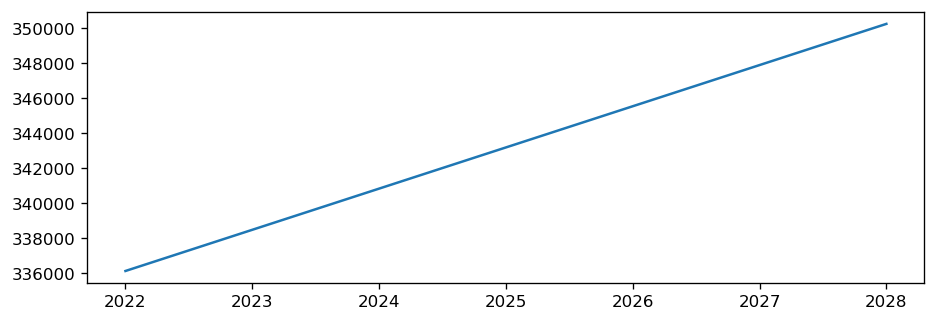

2022   336134.000
2023   338485.000
2024   340836.000
2025   343187.000
2026   345538.000
2027   347889.000
2028   350240.000
Name: predicted_mean, dtype: float64

In [89]:
y_pred.plot()
plt.show()
y_pred